In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import linregress
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Load the songs dataset
songs_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Term-2/KBHS_Group_Project/data/songs_dataset.csv')

# Load the artist terms dataset
artists_terms_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Term-2/KBHS_Group_Project/data/artist_terms.csv')

artist = artists_terms_df
song = songs_df

print('Artist shape',artist.shape,'\nSong shape',song.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Artist shape (1109381, 2) 
Song shape (999040, 15)


# **Data Pre-Processing**
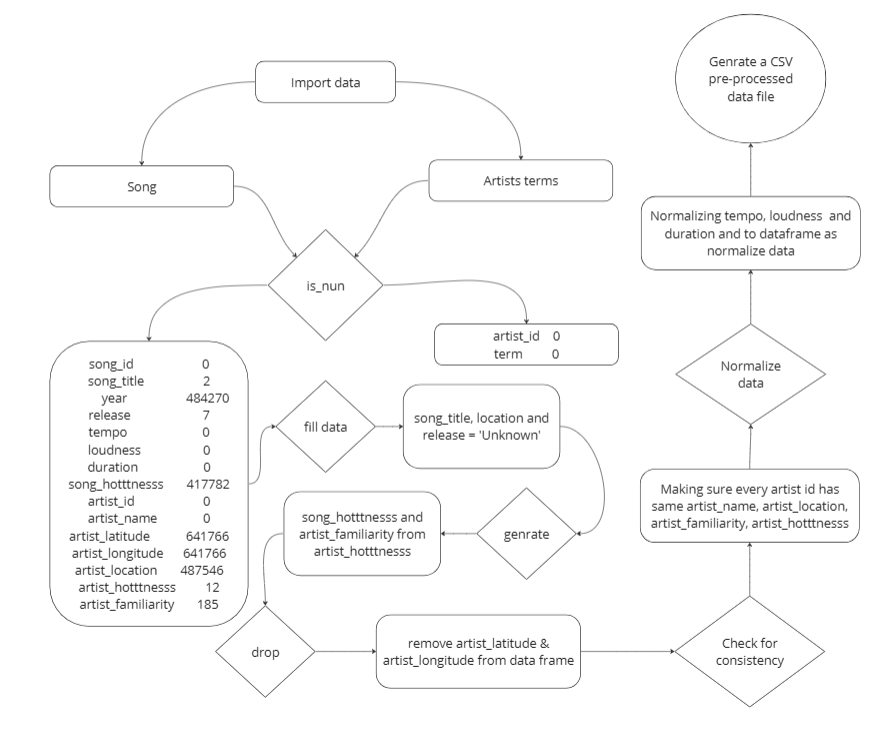

# **Null value adding**

In [ ]:
# Cheacking for null data
print("Null value for artists terms \n",artist.isnull().sum())
print("\nNull value for song \n",song.isnull().sum())

Null value for artists terms 
 artist_id    0
term         0
dtype: int64

Null value for song 
 song_id                    0
song_title                 2
year                  484270
release                    7
tempo                      0
loudness                   0
duration                   0
song_hotttnesss       417782
artist_id                  0
artist_name                0
artist_latitude       641766
artist_longitude      641766
artist_location       487546
artist_hotttnesss         12
artist_familiarity       185
dtype: int64


Number of instances where song_hotttnesss is nearly equal to artist_hotttnesss: 225801 and that is 38.85% songs


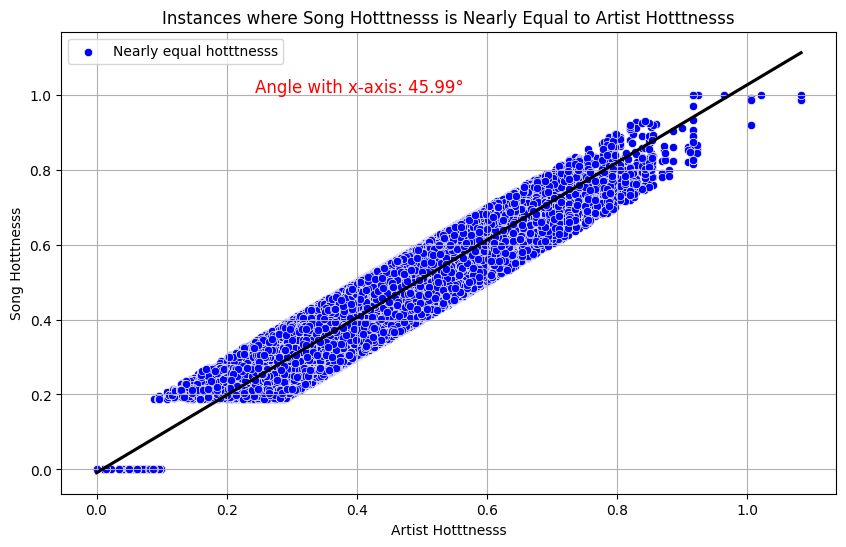

In [ ]:
# Define the tolerance level for "nearly equal"
tolerance = 0.1

# Filter rows where the absolute difference between song_hotttnesss and artist_hotttnesss is less than the tolerance
nearly_equal_hotttnesss = song.dropna(subset=['song_hotttnesss', 'artist_hotttnesss'])
nearly_equal_hotttnesss = nearly_equal_hotttnesss[abs(nearly_equal_hotttnesss['song_hotttnesss'] - nearly_equal_hotttnesss['artist_hotttnesss']) < tolerance]

# Count the number of such instances
num_nearly_equal_hotttnesss = nearly_equal_hotttnesss.shape[0]
percentage_nearly_equal = (num_nearly_equal_hotttnesss * 100) / len(song.dropna(subset=['song_hotttnesss', 'artist_hotttnesss']))
print(f"Number of instances where song_hotttnesss is nearly equal to artist_hotttnesss: {num_nearly_equal_hotttnesss} and that is {percentage_nearly_equal:.2f}% songs")

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(nearly_equal_hotttnesss['artist_hotttnesss'], nearly_equal_hotttnesss['song_hotttnesss'])

# Calculate the angle of the regression line with the x-axis
angle = np.degrees(np.arctan(slope))
angle_song_hotttnesss = angle
# Plotting the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nearly_equal_hotttnesss, x='artist_hotttnesss', y='song_hotttnesss', color='blue', label='Nearly equal hotttnesss')
sns.regplot(data=nearly_equal_hotttnesss, x='artist_hotttnesss', y='song_hotttnesss', scatter=False, color='black', line_kws={'label':'Regression Line'}, ci=None)

# Annotate the angle on the plot
plt.annotate(f'Angle with x-axis: {angle:.2f}°', xy=(0.25, 0.90), xycoords='axes fraction', fontsize=12, color='red', ha='left', va='top')

plt.xlabel('Artist Hotttnesss')
plt.ylabel('Song Hotttnesss')
plt.title('Instances where Song Hotttnesss is Nearly Equal to Artist Hotttnesss')
plt.legend()
plt.grid(True)
plt.show()

Number of instances where artist_familiarity is nearly equal to artist_hotttnesss: 155600 and that is 15.58%


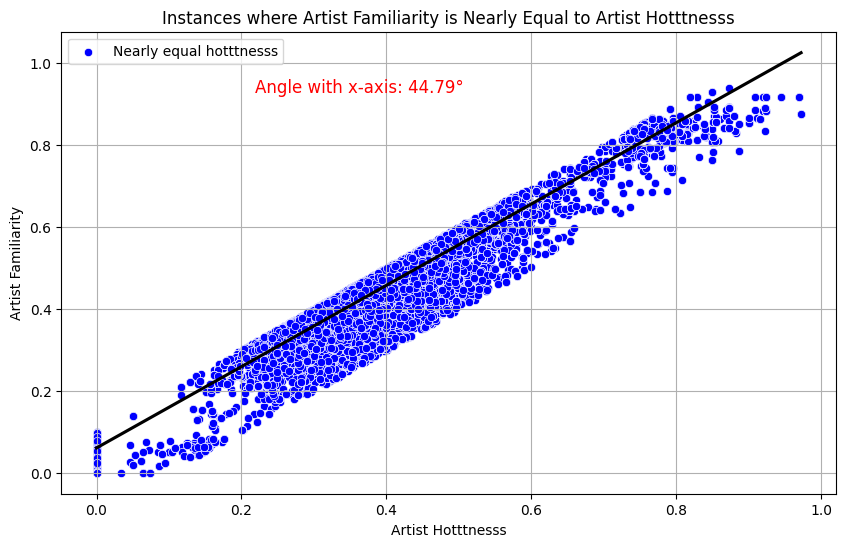

In [ ]:
# Define the tolerance level for "nearly equal"
tolerance = 0.1

# Filter rows where the absolute difference between artist_familiarity and artist_hotttnesss is less than the tolerance
nearly_equal = song.dropna(subset=['artist_familiarity', 'artist_hotttnesss'])
nearly_equal = nearly_equal[abs(nearly_equal['artist_familiarity'] - nearly_equal['artist_hotttnesss']) < tolerance]

# Count the number of such instances
num_nearly_equal = nearly_equal.shape[0]
percentage_nearly_equal = (num_nearly_equal * 100) / len(song.dropna(subset=['artist_familiarity', 'artist_hotttnesss']))
print(f"Number of instances where artist_familiarity is nearly equal to artist_hotttnesss: {num_nearly_equal} and that is {percentage_nearly_equal:.2f}%")

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(nearly_equal['artist_hotttnesss'], nearly_equal['artist_familiarity'])

# Calculate the angle of the regression line with the x-axis
angle = np.degrees(np.arctan(slope))
angle_artist_familiarity = angle

# Plotting the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nearly_equal, x='artist_hotttnesss', y='artist_familiarity', color='blue', label='Nearly equal hotttnesss')
sns.regplot(data=nearly_equal, x='artist_hotttnesss', y='artist_familiarity', scatter=False, color='black', line_kws={'label':'Regression Line'}, ci=None)

# Annotate the angle on the plot
plt.annotate(f'Angle with x-axis: {angle:.2f}°', xy=(0.25, 0.90), xycoords='axes fraction', fontsize=12, color='red', ha='left', va='top')

plt.xlabel('Artist Hotttnesss')
plt.ylabel('Artist Familiarity')
plt.title('Instances where Artist Familiarity is Nearly Equal to Artist Hotttnesss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Filling Null values")
song = song.fillna({'song_title': 'Unknown',
             'year': 0000,
             'release': 'Unknown',
             'artist_location': 'Unknown',
             'artist_hotttnesss': 0})
song['artist_familiarity'].fillna(song['artist_hotttnesss']* np.tan(angle_artist_familiarity), inplace=True)
song['song_hotttnesss'].fillna(song['artist_hotttnesss']* np.tan(angle_song_hotttnesss), inplace=True)
song.drop(columns=['artist_latitude', 'artist_longitude'], inplace=True)
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

song['decade'] = song['year'].apply(get_decade)

Filling Null values


In [ ]:
# cheacking for null value after feeding it
print(song.isnull().sum())

song_id               0
song_title            0
year                  0
release               0
tempo                 0
loudness              0
duration              0
song_hotttnesss       0
artist_id             0
artist_name           0
artist_location       0
artist_hotttnesss     0
artist_familiarity    0
decade                0
dtype: int64


# **Check for consistency**

In [ ]:
def check_consistency(song):
    # Check for consistency in artist names
    grouped_data_name = song.groupby('artist_id')['artist_name'].unique()
    consistent_count_name = sum(len(names) == 1 for names in grouped_data_name)
    inconsistent_count_name = len(grouped_data_name) - consistent_count_name
    print("Number of artist IDs with consistent names:", consistent_count_name)
    print("Number of artist IDs with inconsistent names:", inconsistent_count_name)

    # Check for consistency in artist locations
    grouped_data_loc = song.groupby('artist_id')['artist_location'].unique()
    consistent_count_loc = sum(len(locations) == 1 for locations in grouped_data_loc)
    inconsistent_count_loc = len(grouped_data_loc) - consistent_count_loc
    print("Number of artist IDs with consistent locations:", consistent_count_loc)
    print("Number of artist IDs with inconsistent locations:", inconsistent_count_loc)

    # Check for consistency in artist familiarity
    grouped_data_familiarity = song.groupby('artist_id')['artist_familiarity'].std()
    consistent_count_familiarity = sum(std == 0 or pd.isna(std) for std in grouped_data_familiarity)
    inconsistent_count_familiarity = len(grouped_data_familiarity) - consistent_count_familiarity
    print("Number of artist IDs with consistent familiarity:", consistent_count_familiarity)
    print("Number of artist IDs with inconsistent familiarity:", inconsistent_count_familiarity)

    # Check for consistency in artist hotttnesss
    grouped_data_hotttnesss = song.groupby('artist_id')['artist_hotttnesss'].std()
    consistent_count_hotttnesss = sum(std == 0 or pd.isna(std) for std in grouped_data_hotttnesss)
    inconsistent_count_hotttnesss = len(grouped_data_hotttnesss) - consistent_count_hotttnesss
    print("Number of artist IDs with consistent hotttnesss:", consistent_count_hotttnesss)
    print("Number of artist IDs with inconsistent hotttnesss:", inconsistent_count_hotttnesss)

In [ ]:
check_consistency(song)

Number of artist IDs with consistent names: 30967
Number of artist IDs with inconsistent names: 13777
Number of artist IDs with consistent locations: 42542
Number of artist IDs with inconsistent locations: 2202
Number of artist IDs with consistent familiarity: 36214
Number of artist IDs with inconsistent familiarity: 8530
Number of artist IDs with consistent hotttnesss: 41283
Number of artist IDs with inconsistent hotttnesss: 3461


In [ ]:
# Function to get the most common value (mode) or the first if there's a tie
def get_most_common(series):
    return series.mode()[0]

# Apply aggregations
aggregated_data = song.groupby('artist_id').agg({
    'artist_name': lambda x: x.mode()[0],
    'artist_location': lambda x: x.mode()[0],
    'artist_familiarity': 'mean',
    'artist_hotttnesss': 'mean'
})

# Map the aggregated data back to the original DataFrame
song['artist_name'] = song['artist_id'].map(aggregated_data['artist_name'])
song['artist_location'] = song['artist_id'].map(aggregated_data['artist_location'])
song['artist_familiarity'] = song['artist_id'].map(aggregated_data['artist_familiarity'])
song['artist_hotttnesss'] = song['artist_id'].map(aggregated_data['artist_hotttnesss'])

In [ ]:
check_consistency(song)

Number of artist IDs with consistent names: 44744
Number of artist IDs with inconsistent names: 0
Number of artist IDs with consistent locations: 44744
Number of artist IDs with inconsistent locations: 0
Number of artist IDs with consistent familiarity: 44744
Number of artist IDs with inconsistent familiarity: 0
Number of artist IDs with consistent hotttnesss: 44744
Number of artist IDs with inconsistent hotttnesss: 0


# **Normalization**

In [ ]:
# Normalization

# Normalise duration, tempo and loudness

# Attributes to normalize
attributes = ['duration', 'tempo', 'loudness']

# Normalisation
scaler = MinMaxScaler()
normalised_data = scaler.fit_transform(song[attributes])

# Create a DataFrame from the normalized data with renamed columns
normalized_columns = [f'normalized_{col}' for col in attributes]
normalised_df = pd.DataFrame(normalised_data, columns=normalized_columns)

# Add the normalized columns to the original DataFrame
for col in normalized_columns:
    song[col] = normalised_df[col]

# Display the updated DataFrame
print(song.head())

              song_id                                         song_title  \
0  SOVFVAK12A8C1350D9                                        Tanssi vaan   
1  SOGTUKN12AB017F4F1                                  No One Could Ever   
2  SOBNYVR12A8C13558C                                      Si Vos Querés   
3  SOHSBXH12A8C13B0DF                                   Tangle Of Aspens   
4  SOZVAPQ12A8C13B63C  Symphony No. 1 G minor "Sinfonie Serieuse"/All...   

     year                               release    tempo  loudness   duration  \
0  1995.0                           Karkuteillä  150.778   -10.555  156.55138   
1  2006.0                                Butter  177.768    -2.060  138.97098   
2  2003.0                               De Culo   87.433    -4.654  145.05751   
3     0.0  Rene Ablaze Presents Winter Sessions  140.035    -7.806  514.29832   
4     0.0      Berwald: Symphonies Nos. 1/2/3/4   90.689   -21.420  816.53506   

   song_hotttnesss           artist_id       artist_name

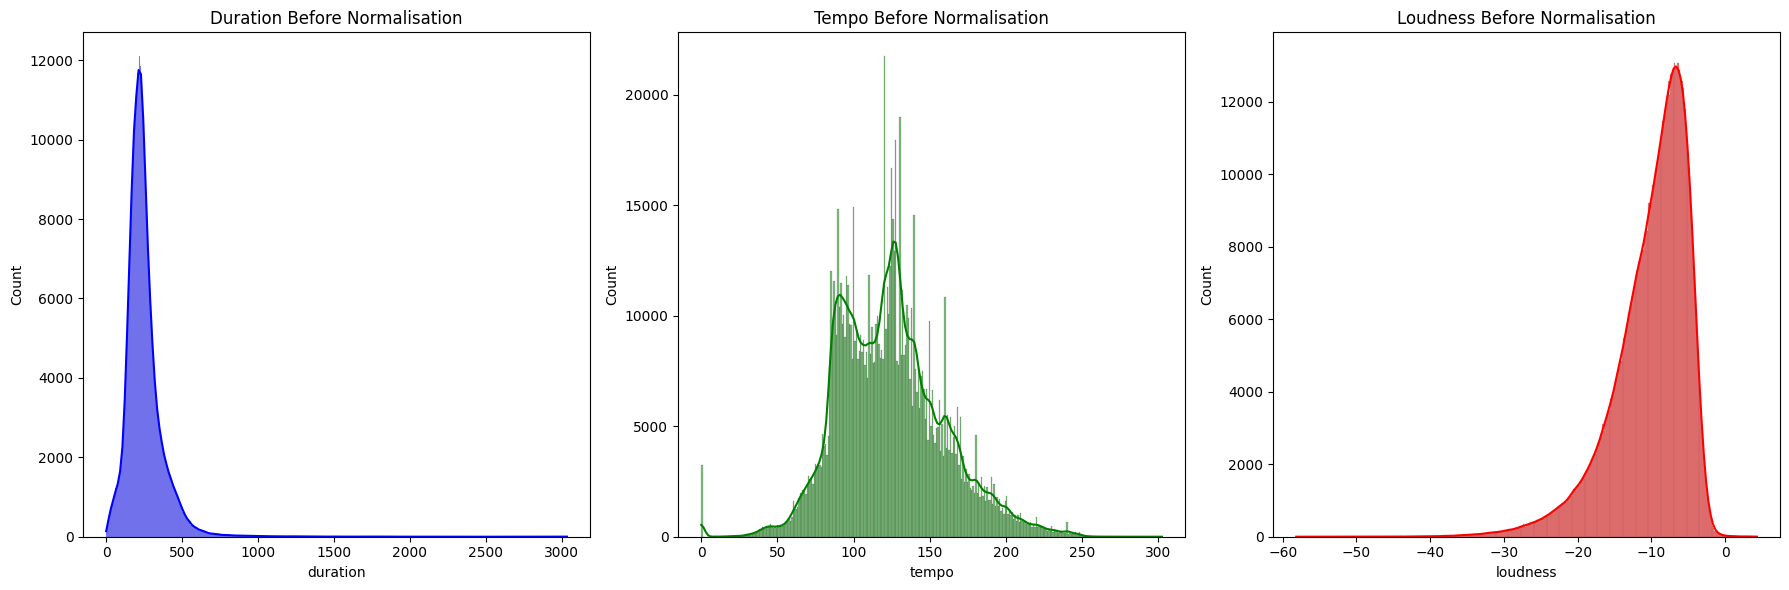

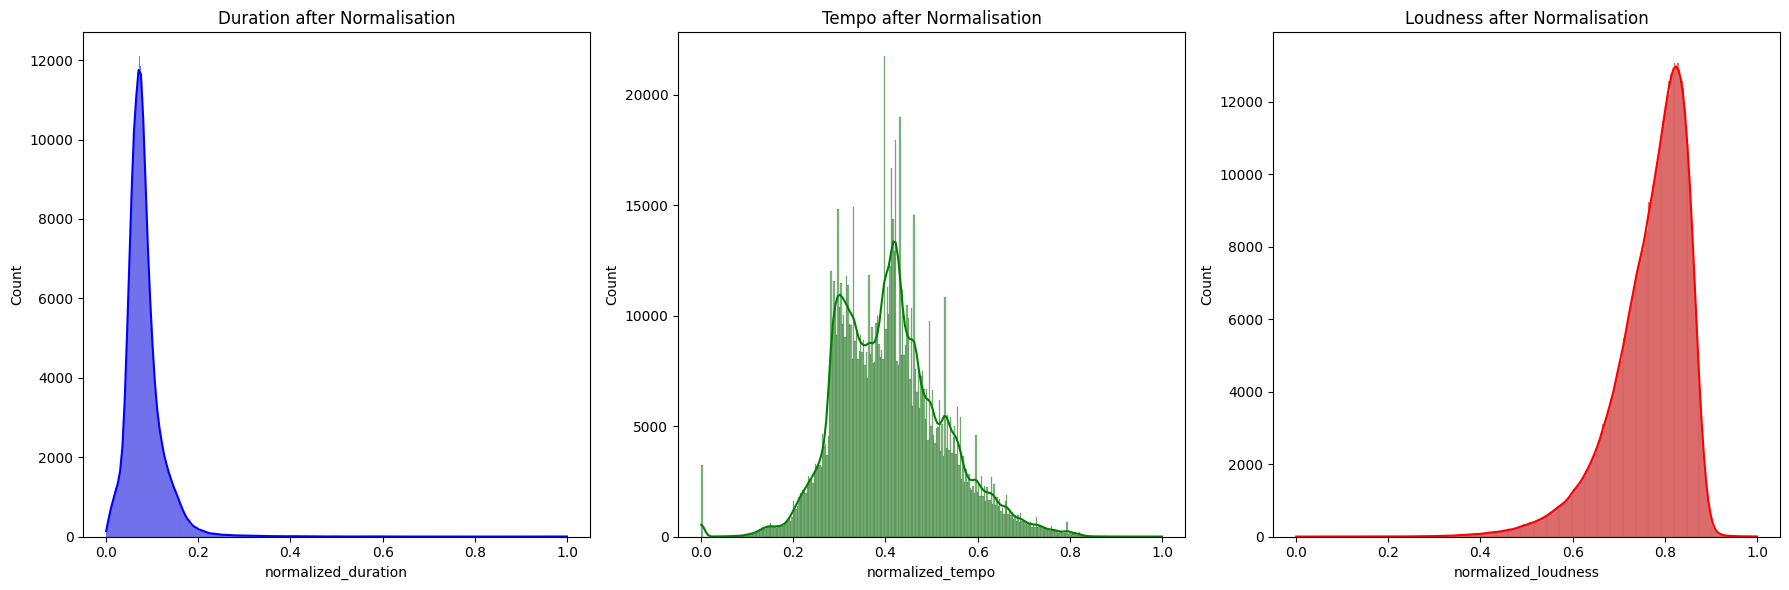

In [ ]:
# Before normalisation
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(song['duration'], kde=True, color='blue')
plt.title('Duration Before Normalisation')

plt.subplot(1, 3, 2)
sns.histplot(song['tempo'], kde=True, color='green')
plt.title('Tempo Before Normalisation')

plt.subplot(1, 3, 3)
sns.histplot(song['loudness'], kde=True, color='red')
plt.title('Loudness Before Normalisation')

plt.tight_layout()
plt.show()

# After normalisation
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(song['normalized_duration'], kde=True, color='blue')
plt.title('Duration after Normalisation')

plt.subplot(1, 3, 2)
sns.histplot(song['normalized_tempo'], kde=True, color='green')
plt.title('Tempo after Normalisation')

plt.subplot(1, 3, 3)
sns.histplot(song['normalized_loudness'], kde=True, color='red')
plt.title('Loudness after Normalisation')

plt.tight_layout()
plt.show()

# **Store to CSV**

In [ ]:
song.to_csv('/content/drive/MyDrive/Colab Notebooks/Term-2/KBHS_Group_Project/data/song_preprocessed.csv', index=False)